In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

### Data Preparation

In [7]:
# get all filenames in the Datasets directory
csv_filenames = os.listdir(path = 'Datasets')

# sort by name ascending
csv_filenames.sort()

display(csv_filenames)

['Data_of_Attack_Back.csv',
 'Data_of_Attack_Back_BufferOverflow.csv',
 'Data_of_Attack_Back_FTPWrite.csv',
 'Data_of_Attack_Back_GuessPassword.csv',
 'Data_of_Attack_Back_NMap.csv',
 'Data_of_Attack_Back_Neptune.csv',
 'Data_of_Attack_Back_Normal.csv',
 'Data_of_Attack_Back_PortSweep.csv',
 'Data_of_Attack_Back_RootKit.csv',
 'Data_of_Attack_Back_Satan.csv',
 'Data_of_Attack_Back_Smurf.csv']

In [8]:
# read data from the filenames stored in csv_file_dct
dfs: dict[str, pd.DataFrame] = dict({file: pd.read_csv(f'Datasets/{file}') for file in csv_filenames})

In [9]:
# check the number of tables
print(f'number of tables: {len(dfs)}')

number of tables: 11


In [10]:
# view some records in each table data
for key, value in dfs.items():
    print(f'{key}:')
    print(f'shape = {value.shape}')
    display(value.head(10))

Data_of_Attack_Back.csv:
shape = (968, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.000,0.000
1,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.000,0.000
2,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.000,0.000
3,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.000,0.000
4,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.000,0.000
5,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.006,0.006,0.1,0,0.017,0,0.0,0.0,0.000,0.000
6,0.0,0,0,0.08,0.5454,0.08314,0,0,0,0.2,...,0.007,0.007,0.1,0,0.014,0,0.0,0.0,0.014,0.014
7,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.008,0.008,0.1,0,0.012,0,0.0,0.0,0.012,0.012
8,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.009,0.009,0.1,0,0.011,0,0.0,0.0,0.011,0.011
9,0.0,0,0,0.00,0.5454,0.08314,0,0,0,0.2,...,0.010,0.010,0.1,0,0.010,0,0.0,0.0,0.010,0.010


Data_of_Attack_Back_BufferOverflow.csv:
shape = (30, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0
5,0.0113,0,0.05,0.0,0.06274,0.16771,0,0,0,0.5,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
6,0.0053,0,0.05,0.0,0.02628,0.03860,0,0,0,0.3,...,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0
7,0.0000,0,0.14,0.0,0.00000,0.05690,0,0,0,0.0,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
8,0.0000,0,0.14,0.0,0.00000,0.05828,0,0,0,0.0,...,0.002,0.002,0.1,0,0.10,0.000,0,0,0.0,0.0
9,0.0000,0,0.14,0.0,0.00000,0.05020,0,0,0,0.0,...,0.003,0.003,0.1,0,0.10,0.000,0,0,0.0,0.0


Data_of_Attack_Back_FTPWrite.csv:
shape = (7, 41)


,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
5,0.0000,0,0.14,0,0.00676,0.00000,0,0,0.0,0.0,...,0.001,0.004,0.10,0.0,0.10,0.050,0,0,0,0
6,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.005,0.10,0.0,0.10,0.040,0,0,0,0


Data_of_Attack_Back_GuessPassword.csv:
shape = (53, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075
5,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.005,0.005,0.1,0,0.020,0.0,0.020,0.020,0.080,0.080
6,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.006,0.006,0.1,0,0.017,0.0,0.017,0.017,0.083,0.083
7,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.007,0.007,0.1,0,0.014,0.0,0.014,0.014,0.086,0.086
8,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.008,0.008,0.1,0,0.012,0.0,0.012,0.012,0.088,0.088
9,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.009,0.009,0.1,0,0.011,0.0,0.011,0.011,0.089,0.089


Data_of_Attack_Back_NMap.csv:
shape = (1554, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.000,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.000,0.0,0,0
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.003,0.060,0.060,0.060,0.0,0.000,0.0,0,0
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.006,0.004,0.067,0.050,0.067,0.0,0.000,0.0,0,0
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.007,0.005,0.071,0.043,0.071,0.0,0.000,0.0,0,0
5,0,0.00,0.12,0.1,0.00000,0.0,0,0,0,0,...,0.008,0.001,0.012,0.050,0.012,0.0,0.012,0.1,0,0
6,0,0.00,0.12,0.1,0.00000,0.0,0,0,0,0,...,0.009,0.001,0.011,0.056,0.022,0.0,0.022,0.1,0,0
7,0,0.00,0.12,0.1,0.00000,0.0,0,0,0,0,...,0.010,0.001,0.010,0.060,0.030,0.0,0.030,0.1,0,0
8,0,0.00,0.12,0.1,0.00000,0.0,0,0,0,0,...,0.011,0.001,0.009,0.064,0.036,0.0,0.036,0.1,0,0
9,0,0.00,0.12,0.1,0.00000,0.0,0,0,0,0,...,0.012,0.001,0.008,0.067,0.042,0.0,0.042,0.1,0,0


Data_of_Attack_Back_Neptune.csv:
shape = (227228, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.001,0.002,0.1,0.0,0.100,0.100,0.1,0.050,0.0,0.0
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.003,0.1,0.0,0.050,0.067,0.1,0.067,0.0,0.0
2,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.003,0.004,0.1,0.0,0.033,0.050,0.1,0.075,0.0,0.0
3,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.004,0.005,0.1,0.0,0.025,0.040,0.1,0.080,0.0,0.0
4,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.005,0.006,0.1,0.0,0.020,0.033,0.1,0.083,0.0,0.0
5,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.006,0.007,0.1,0.0,0.017,0.029,0.1,0.086,0.0,0.0
6,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.007,0.008,0.1,0.0,0.014,0.025,0.1,0.088,0.0,0.0
7,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.008,0.009,0.1,0.0,0.012,0.022,0.1,0.089,0.0,0.0
8,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.009,0.010,0.1,0.0,0.011,0.020,0.1,0.090,0.0,0.0
9,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.010,0.011,0.1,0.0,0.010,0.018,0.1,0.091,0.0,0.0


Data_of_Attack_Back_Normal.csv:
shape = (576710, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.00238,0.01282,0,0,0.0,0.0,...,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.00235,0.01337,0,0,0.0,0.0,...,0.006,0.006,0.1,0.0,0.017,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.00234,0.01364,0,0,0.0,0.0,...,0.007,0.007,0.1,0.0,0.014,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.00239,0.01295,0,0,0.0,0.0,...,0.008,0.008,0.1,0.0,0.012,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.00181,0.05450,0,0,0.0,0.0,...,0.009,0.009,0.1,0.0,0.011,0.0,0.0,0.0,0.0,0.0


Data_of_Attack_Back_PortSweep.csv:
shape = (2964, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.173,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.174,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.175,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100
5,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.176,0.002,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100
6,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.177,0.001,0.001,0.004,0.004,0.000,0.001,0.0,0.032,0.100
7,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.178,0.002,0.001,0.004,0.004,0.000,0.001,0.0,0.032,0.100
8,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.179,0.001,0.001,0.004,0.005,0.000,0.001,0.0,0.032,0.100
9,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.180,0.002,0.001,0.004,0.006,0.000,0.001,0.0,0.033,0.100


Data_of_Attack_Back_RootKit.csv:
shape = (10, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0060,0.00,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.00,0.00,0,0.000,0.000,0.000
1,0.0060,0.00,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.00,0.00,0,0.000,0.000,0.000
2,0.0708,0.00,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.255,0.003,0.001,0.002,0.00,0.00,0,0.000,0.000,0.000
3,0.0021,0.00,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.255,0.001,0.000,0.002,0.00,0.00,0,0.000,0.000,0.000
4,0.0098,0.00,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.255,0.004,0.002,0.002,0.00,0.00,0,0.000,0.000,0.000
5,0.0000,0.00,0.14,0,0.00000,0.05636,0,0,0.0,0.0,...,0.001,0.041,0.100,0.000,0.10,0.01,0,0.000,0.000,0.000
6,0.0061,0.00,0.05,0,0.00294,0.03929,0,0,0.0,0.0,...,0.255,0.004,0.002,0.002,0.00,0.00,0,0.025,0.073,0.025
7,0.0000,0.01,0.10,0,0.00032,0.00000,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.00,0.00,0,0.000,0.000,0.000
8,0.0000,0.01,0.10,0,0.00004,0.00004,0,0,0.0,0.0,...,0.001,0.001,0.100,0.000,0.10,0.00,0,0.000,0.000,0.000
9,0.0000,0.01,0.10,0,0.00004,0.00000,0,0,0.0,0.0,...,0.002,0.002,0.100,0.000,0.05,0.00,0,0.000,0.000,0.000


Data_of_Attack_Back_Satan.csv:
shape = (5019, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.02,0.06,0.0,0.00020,0.00000,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0000,0.02,0.06,0.0,0.00020,0.00000,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0
2,0.0000,0.02,0.06,0.0,0.00020,0.00000,0,0,0,0.0,...,0.145,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0
3,0.0000,0.01,0.12,0.0,0.00001,0.00000,0,0,0,0.0,...,0.146,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
4,0.0000,0.01,0.12,0.0,0.00001,0.00000,0,0,0,0.0,...,0.147,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
5,0.0000,0.01,0.12,0.0,0.00001,0.00000,0,0,0,0.0,...,0.148,0.001,0.001,0.005,0.002,0.0,0.001,0.0,0.0,0.0
6,0.0000,0.01,0.12,0.0,0.00001,0.00000,0,0,0,0.0,...,0.149,0.002,0.001,0.005,0.003,0.0,0.001,0.0,0.0,0.0
7,0.0000,0.01,0.02,0.0,0.00001,0.00000,0,0,0,0.0,...,0.150,0.001,0.001,0.006,0.003,0.0,0.001,0.0,0.0,0.0
8,0.0000,0.00,0.04,0.0,0.00005,0.01886,0,0,0,0.0,...,0.151,0.003,0.002,0.006,0.001,0.0,0.001,0.0,0.0,0.0
9,0.0001,0.00,0.04,0.0,0.00006,0.01405,0,0,0,0.0,...,0.152,0.004,0.003,0.006,0.001,0.0,0.001,0.0,0.0,0.0


Data_of_Attack_Back_Smurf.csv:
shape = (3007, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.148,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.149,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.150,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0
5,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.151,0.006,0.004,0.002,0.004,0,0.0,0,0.0,0
6,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.152,0.007,0.005,0.002,0.005,0,0.0,0,0.0,0
7,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.153,0.008,0.005,0.002,0.005,0,0.0,0,0.0,0
8,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.154,0.009,0.006,0.002,0.006,0,0.0,0,0.0,0
9,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.155,0.010,0.006,0.002,0.006,0,0.0,0,0.0,0


In [11]:
# column names are missing in this dataset
display(dfs['Data_of_Attack_Back_FTPWrite.csv'])

,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
5,0.0000,0,0.14,0,0.00676,0.00000,0,0,0.0,0.0,...,0.001,0.004,0.10,0.0,0.10,0.050,0,0,0,0
6,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.005,0.10,0.0,0.10,0.040,0,0,0,0


In [12]:
# set the new column and save the value
tmp_dict = dict([(column, value) for (column, value) in zip(dfs['Data_of_Attack_Back.csv'].columns, dfs['Data_of_Attack_Back_FTPWrite.csv'].columns)])
display(pd.DataFrame(tmp_dict, index = [0]))


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26


In [13]:
dfs['Data_of_Attack_Back_FTPWrite.csv'] = dfs['Data_of_Attack_Back_FTPWrite.csv'].set_axis(
    dfs['Data_of_Attack_Back.csv'].columns, axis = 'columns',
    copy = False,
)


In [14]:
display(dfs['Data_of_Attack_Back_FTPWrite.csv'])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
5,0.0000,0,0.14,0,0.00676,0.00000,0,0,0.0,0.0,...,0.001,0.004,0.10,0.0,0.10,0.050,0,0,0,0
6,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.005,0.10,0.0,0.10,0.040,0,0,0,0


In [15]:
# concat with the old value
dfs['Data_of_Attack_Back_FTPWrite.csv'] = pd.concat([pd.DataFrame(tmp_dict, index = [0]), dfs['Data_of_Attack_Back_FTPWrite.csv'].loc[:]]).reset_index(drop = True)

In [16]:
# check the table again
display(dfs['Data_of_Attack_Back_FTPWrite.csv'])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
1,0.0134,0,0.34,0,0.001,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.0,0,0,0,0
2,0.0,0,0.14,0,0.00613,0.0,0,0,0.0,0.0,...,0.001,0.084,0.1,0.0,0.1,0.002,0,0,0,0
3,0.0,0,0.14,0,0.0,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.1,0.0,0.1,0.002,0,0,0,0
4,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.1,0.0,0.1,0.0,0,0,0,0
5,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.0,0,0,0,0
6,0.0,0,0.14,0,0.00676,0.0,0,0,0.0,0.0,...,0.001,0.004,0.1,0.0,0.1,0.05,0,0,0,0
7,0.0,0,0.14,0,0.0,0.00005,0,0,0.0,0.0,...,0.002,0.005,0.1,0.0,0.1,0.04,0,0,0,0


In [17]:
# check the shape of each table
for key, value in dfs.items():
    print(f'{key}: {value.shape}')

Data_of_Attack_Back.csv: (968, 41)
Data_of_Attack_Back_BufferOverflow.csv: (30, 41)
Data_of_Attack_Back_FTPWrite.csv: (8, 41)
Data_of_Attack_Back_GuessPassword.csv: (53, 41)
Data_of_Attack_Back_NMap.csv: (1554, 41)
Data_of_Attack_Back_Neptune.csv: (227228, 41)
Data_of_Attack_Back_Normal.csv: (576710, 41)
Data_of_Attack_Back_PortSweep.csv: (2964, 41)
Data_of_Attack_Back_RootKit.csv: (10, 41)
Data_of_Attack_Back_Satan.csv: (5019, 41)
Data_of_Attack_Back_Smurf.csv: (3007, 41)


### Data Manipulation

In [18]:
# combine all data into one data frame
combined_df = pd.DataFrame(columns = dfs['Data_of_Attack_Back.csv'].columns)

# loop
for key, value in dfs.items():
    # append the 'attack' column to each table
    value['attack'] = key.split('.')[0]

    # concat the value into 'combined_df'
    combined_df = pd.concat([combined_df, value])

In [19]:
# view the number of the data records
print(f'number of records = {combined_df.index.size} records')

number of records = 817551 records


In [20]:
combined_df.shape

(817551, 42)

In [21]:
combined_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006],
           dtype='int64', length=817551)

In [22]:
# set new index starting from 0 to size of data
combined_df.reset_index(inplace = True)
combined_df.drop(columns = ['index'], inplace = True, level = None)

In [23]:
combined_df.index

RangeIndex(start=0, stop=817551, step=1)

In [24]:
display(combined_df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.1,0,0.1,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.1,0,0.02,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.251,0.098,0.001,0.098,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817547,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.252,0.099,0.001,0.099,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817548,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.253,0.099,0.001,0.099,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817549,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.254,0.1,0.001,0.1,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf


In [25]:
combined_df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [26]:
# remove white space before column names
new_columns = np.array(combined_df.columns)

for i in range(0, len(new_columns)):
    new_columns[i] = new_columns[i].strip(' ')

combined_df = combined_df.set_axis(
    new_columns, 
    axis = 'columns',
    copy = False,
)

# check columns again
print(combined_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')


In [21]:
# test
# df: pd.DataFrame = combined_df.copy()

In [22]:
# df['col'] = pd.to_numeric(df['col'], errors='coerce')

# for c in df.columns:
#     df[c] = pd.to_numeric(df[c], errors = 'coerce')

In [23]:
# display(df)

In [24]:
# df.isnull().sum()
# for c in df.columns:
#     for value in df[c]:
#         if type(value) == str and value.count(' '):
#             print(f'{c}: {value}')
#             break


In [27]:
display(combined_df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.1,0,0.1,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.1,0,0.02,0,0.0,0.0,0.0,0.0,Data_of_Attack_Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.251,0.098,0.001,0.098,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817547,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.252,0.099,0.001,0.099,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817548,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.253,0.099,0.001,0.099,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf
817549,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.254,0.1,0.001,0.1,0,0.0,0,0.0,0,Data_of_Attack_Back_Smurf


In [28]:
# check wrong format value
for c in combined_df.columns:
    for value in combined_df[c]:
        if type(value) == str and value.count(' '):
            print(f'{c}: {value}')
            break

protocol_type:  0
service:  0.07
flag:  0.3
src_bytes:  0.00116
dst_bytes:  0.00451
land:  0.4
wrong_fragment:  0.5
urgent:  0.6
hot:  0.2
num_failed_logins:  0.7
logged_in:  0.1
num_compromised:  0.8
root_shell:  0.9
su_attempted:  0.10
num_root:  0.11
num_file_creations:  0.1.1
num_shells:  0.12
num_access_files:  0.1.2
num_outbound_cmds:  0.13
is_host_login:  0.14
is_guest_login:  0.1.3
count:  0.001
srv_count:  0.001.1
serror_rate:  0.15
srv_error_rate:  0.16
rerror_rate:  0.17
srv_rerror_rate:  0.18
same_srv_rate:  0.1.4
diff_srv_rate:  0.19
srv_diff_host_rate:  0.20
dst_host_count:  0.001.2
dst_host_srv_count:  0.001.3
dst_host_same_srv_rate:  0.1.5
dst_host_diff_srv_rate:  0.21
dst_host_same_src_port_rate:  0.1.6
dst_host_srv_diff_host_rate:  0.22
dst_host_serror_rate:  0.23
dst_host_srv_serror_rate:  0.24
dst_host_rerror_rate:  0.25
dst_host_srv_rerror_rate:  0.26


In [29]:
# convert the wrong format data into nan
for c in combined_df.columns:
    if (c == 'attack'): break
    combined_df[c] = pd.to_numeric(combined_df[c], errors = 'coerce')

In [30]:
# check wrong format value
for c in combined_df.columns:
    for value in combined_df[c]:
        if type(value) == str and value.count(' '):
            print(f'{c}: {value}')
            break

In [31]:
combined_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             1
num_shells                     0
num_access_files               1
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 1
count                          0
srv_count                      1
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  1
diff_srv_rate                  0
srv_diff_h

In [32]:
# remove nan value
combined_df.dropna(inplace = True)

In [33]:
combined_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [34]:
combined_df.shape

(817550, 42)

## Binomial

In [30]:
# add is_normal column to identify if the activity is an attack or a normal activity
combined_df['is_normal'] = combined_df['attack'].apply(
    lambda x : 1 if x == 'Data_of_Attack_Back_Normal' else 0
)

In [31]:
display(combined_df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,is_normal
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back,0
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back,0
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back,0
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back,0
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back_Smurf,0
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back_Smurf,0
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back_Smurf,0
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Data_of_Attack_Back_Smurf,0


In [42]:
# check binomial values of attack_binary column
display(combined_df['is_normal'].unique())

array([0, 1])

In [36]:
X = combined_df.drop(['attack', 'attack_binary'], axis = 'columns')
Y = combined_df['attack_binary']

In [37]:
display(X)
print(Y)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.005,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0


0         0
1         0
2         0
3         0
4         0
         ..
817546    0
817547    0
817548    0
817549    0
817550    0
Name: attack_binary, Length: 817550, dtype: int64


<Axes: ylabel='attack_binary'>

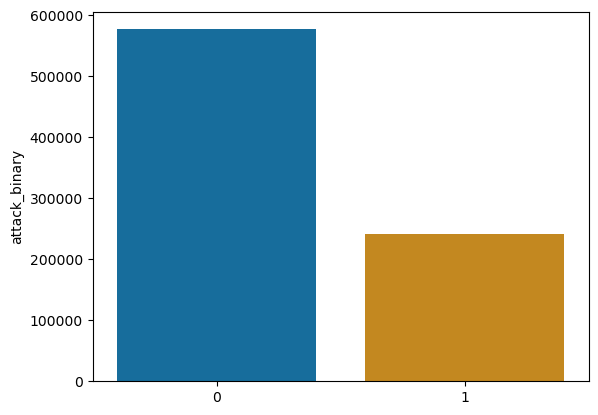

In [38]:
sns.set_palette(sns.color_palette('colorblind'), 2)

sns.barplot(x = combined_df['attack_binary'].unique(), y = pd.value_counts(combined_df['attack_binary']))

### Modeling

In [39]:
# train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [40]:
# Classifier = RandomForestClassifier()

In [41]:
# Classifier.fit(train_X, train_Y)

## Multinomial

<Axes: >

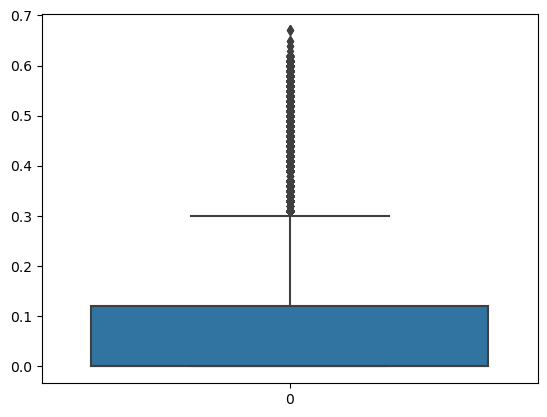

In [35]:
# outlier
sns.boxplot(combined_df['service'])

In [36]:
# check the attack categories
combined_df['attack'].unique()

array(['Data_of_Attack_Back', 'Data_of_Attack_Back_BufferOverflow',
       'Data_of_Attack_Back_FTPWrite',
       'Data_of_Attack_Back_GuessPassword', 'Data_of_Attack_Back_NMap',
       'Data_of_Attack_Back_Neptune', 'Data_of_Attack_Back_Normal',
       'Data_of_Attack_Back_PortSweep', 'Data_of_Attack_Back_RootKit',
       'Data_of_Attack_Back_Satan', 'Data_of_Attack_Back_Smurf'],
      dtype=object)

In [37]:
# create the attack_value column to provide and store the value of each attack category
combined_df['attack_value'] = np.nan

In [38]:
attacks = list(combined_df['attack'].unique())
attacks.remove('Data_of_Attack_Back_Normal')

# set the value of normal to 1
attack_value_dict = {'Data_of_Attack_Back_Normal': 1}

# set the value of other categories
for i in range(2, len(attacks) + 2):
    attack_value_dict[attacks[i - 2]] = i

display(attack_value_dict)

{'Data_of_Attack_Back_Normal': 1,
 'Data_of_Attack_Back': 2,
 'Data_of_Attack_Back_BufferOverflow': 3,
 'Data_of_Attack_Back_FTPWrite': 4,
 'Data_of_Attack_Back_GuessPassword': 5,
 'Data_of_Attack_Back_NMap': 6,
 'Data_of_Attack_Back_Neptune': 7,
 'Data_of_Attack_Back_PortSweep': 8,
 'Data_of_Attack_Back_RootKit': 9,
 'Data_of_Attack_Back_Satan': 10,
 'Data_of_Attack_Back_Smurf': 11}

In [39]:
# add value to each attack in the dataframe
for attack, value in attack_value_dict.items():
    combined_df['attack_value'] = np.where(combined_df['attack'] == attack, value, combined_df['attack_value'])


In [40]:
combined_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_value
0,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.100,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
1,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.050,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
2,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.033,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
3,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.025,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
4,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.020,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
5,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.017,0.0,0.0,0.0,0.000,0.000,Data_of_Attack_Back,2.0
6,0.0,0.0,0.0,0.08,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.014,0.0,0.0,0.0,0.014,0.014,Data_of_Attack_Back,2.0
7,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.012,0.0,0.0,0.0,0.012,0.012,Data_of_Attack_Back,2.0
8,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.011,0.0,0.0,0.0,0.011,0.011,Data_of_Attack_Back,2.0
9,0.0,0.0,0.0,0.00,0.5454,0.08314,0.0,0.0,0.0,0.2,...,0.1,0.0,0.010,0.0,0.0,0.0,0.010,0.010,Data_of_Attack_Back,2.0


In [41]:
combined_df.shape

(817550, 43)

In [42]:
# count the number of each attack category
pd.value_counts(combined_df['attack'])

Data_of_Attack_Back_Normal            576710
Data_of_Attack_Back_Neptune           227228
Data_of_Attack_Back_Satan               5019
Data_of_Attack_Back_Smurf               3007
Data_of_Attack_Back_PortSweep           2964
Data_of_Attack_Back_NMap                1554
Data_of_Attack_Back                      968
Data_of_Attack_Back_GuessPassword         53
Data_of_Attack_Back_BufferOverflow        30
Data_of_Attack_Back_RootKit               10
Data_of_Attack_Back_FTPWrite               7
Name: attack, dtype: int64

In [43]:
pd.value_counts(combined_df['attack_value'])

1.0     576710
7.0     227228
10.0      5019
11.0      3007
8.0       2964
6.0       1554
2.0        968
5.0         53
3.0         30
9.0         10
4.0          7
Name: attack_value, dtype: int64

In [44]:
# check all attack values
combined_df['attack_value'].unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  1.,  8.,  9., 10., 11.])

In [45]:

Xm = combined_df.drop(columns = ['attack_value', 'attack'])
Ym = combined_df['attack_value']

In [46]:
Xm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817550 entries, 0 to 817550
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag                         817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  float64
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13 

In [47]:
display(Xm)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0.0,0.0,0.0,0.2,...,0.005,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0


In [48]:
print(Ym.nunique())

11


In [49]:
ros = RandomOverSampler(random_state = 123)

In [50]:
resampled_X, resampled_y = ros.fit_resample(Xm, Ym)

In [51]:
resampled_y.nunique()

11

In [52]:
Ym = resampled_y.sample(frac = .01)
Xm = resampled_X.loc[Ym.index]

In [53]:
Xm.shape

(63438, 41)

In [54]:
Ym.shape

(63438,)

#### Feature Engineering

In [56]:
# SKB = SelectKBest(f_classif, k = 12).fit(Xm, Ym)
# Xm.columns[SKB.get_support()].values


In [57]:
cols = ['service', 'src_bytes', 'dst_bytes', 'logged_in', 'serror_rate', 'srv_error_rate',
        'same_srv_rate', 
        'dst_host_same_srv_rate', 
        'dst_host_same_src_port_rate', 
        'dst_host_serror_rate', 
        'dst_host_srv_serror_rate', 
        'dst_host_srv_rerror_rate'
]

#...
# Xm = combined_df.drop(columns = ['attack_value', 'attack'])
# Ym = Xm['']

# df.drop(df[df['Fee'] >= 24000].index, inplace = True)
# Xm.drop(Xm['same_srv_rate'].count(' ') > 0)
        
Xm = Xm[cols]


In [58]:
m_df = combined_df[cols + ['attack_value']]

In [59]:
for c in Xm.columns:
    for value in Xm[c]:
        if type(value) == str and value.count(' '):
            print(f'{c}: {value}')
            break

### Random Forest

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    Xm, Ym, test_size = 0.2, 
    # stratify = Ym
)

In [61]:
print(y_test.nunique())
Xm

11


,service,src_bytes,dst_bytes,logged_in,serror_rate,srv_error_rate,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
3741465,0.12,0.00000,0.00000,0.0,0.100,0.1,0.002,0.002,0.000,0.100,0.100,0.000
3010741,0.05,0.00126,0.00179,0.0,0.000,0.0,0.100,0.100,0.003,0.005,0.005,0.095
3485923,0.06,0.00008,0.00000,0.0,0.000,0.0,0.100,0.100,0.100,0.000,0.000,0.000
4840955,0.07,0.00089,0.00345,0.1,0.000,0.0,0.100,0.000,0.000,0.000,0.000,0.000
4983711,0.10,0.00032,0.00000,0.0,0.000,0.0,0.100,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3367570,0.12,0.00100,0.00000,0.0,0.000,0.0,0.100,0.017,0.017,0.000,0.000,0.000
3294999,0.06,0.00008,0.00000,0.0,0.000,0.0,0.100,0.100,0.100,0.000,0.000,0.000
5332155,0.10,0.00000,0.00000,0.0,0.024,0.0,0.000,0.000,0.000,0.032,0.000,0.100
4235002,0.10,0.00001,0.00000,0.0,0.000,0.0,0.100,0.001,0.100,0.000,0.000,0.100


In [62]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [63]:
model.score(X_test, y_test)

0.9992118537200504

In [83]:
# the actual y value and the predicted y value
pd.concat([pd.Series(y_test.values), pd.Series(model.predict(X_test))], axis = 'columns')

,0,1
0,3.0,3.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0
4,5.0,5.0
...,...,...
12683,8.0,8.0
12684,4.0,4.0
12685,5.0,5.0
12686,10.0,10.0


In [65]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[1121,    0,    1,    2,    0,    0,    0,    0,    0,    3,    0],
       [   0, 1102,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1194,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1096,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1196,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1170,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1199,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1136,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1194,    0,    0],
       [   4,    0,    0,    0,    0,    0,    0,    0,    0, 1154,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1116]])

Text(220.72222222222223, 0.5, 'True')

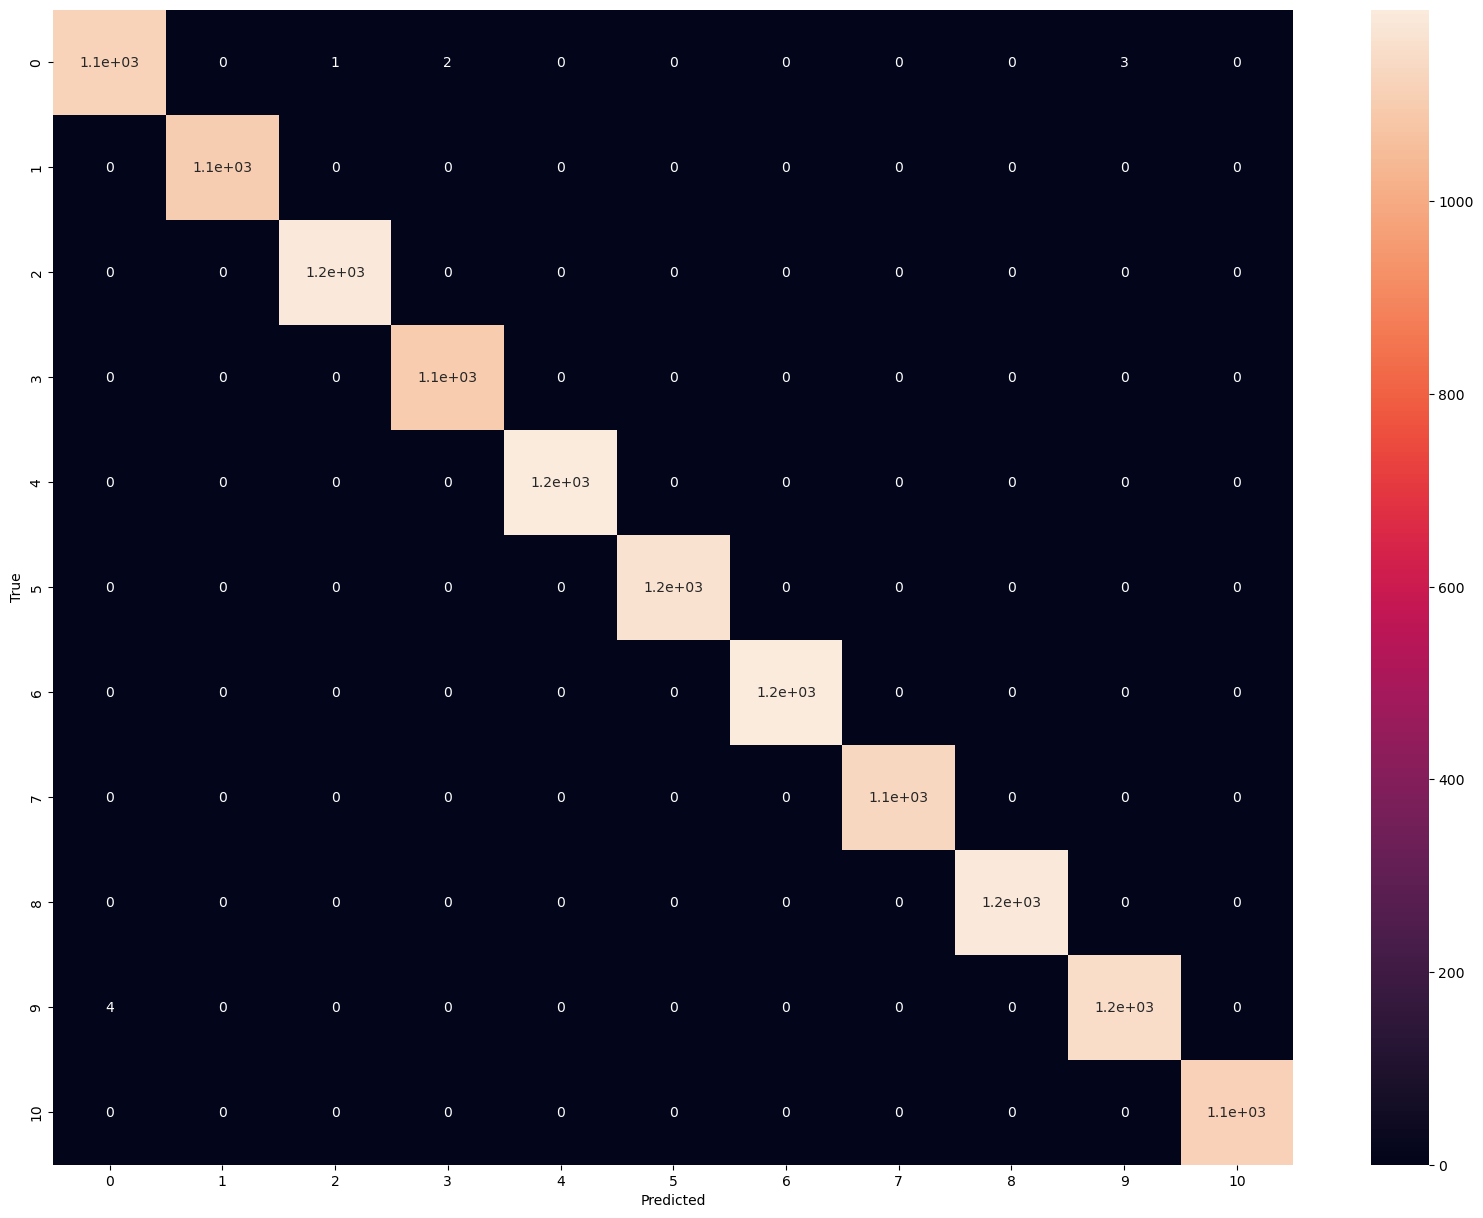

In [67]:
plt.figure(figsize = (20, 15))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [107]:
# predict some values
display(X_test.head(10))
output = model.predict(X_test.head(10))
output = [int(x) for x in output]

display(output)
display(attack_value_dict)



,service,src_bytes,dst_bytes,logged_in,serror_rate,srv_error_rate,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
1670264,0.14,0.00000,0.02072,0.1,0.0,0.0,0.10,0.100,0.100,0.000,0.000,0.000
802738,0.00,0.00232,0.01075,0.1,0.0,0.0,0.10,0.088,0.000,0.000,0.000,0.000
651720,0.00,0.00222,0.01776,0.1,0.0,0.0,0.10,0.100,0.002,0.000,0.000,0.001
1212906,0.00,0.54540,0.08314,0.1,0.0,0.0,0.10,0.100,0.006,0.000,0.000,0.000
3112248,0.05,0.00126,0.00179,0.0,0.0,0.0,0.10,0.100,0.005,0.005,0.005,0.095
5547199,0.10,0.00001,0.00000,0.0,0.0,0.0,0.01,0.000,0.100,0.000,0.000,0.000
1902089,0.05,0.01511,0.02957,0.1,0.0,0.0,0.10,0.100,0.100,0.000,0.000,0.000
2975604,0.05,0.00125,0.00179,0.0,0.0,0.0,0.10,0.100,0.017,0.017,0.017,0.083
1440085,0.05,0.00137,0.01351,0.1,0.0,0.0,0.10,0.100,0.050,0.000,0.000,0.000
288334,0.00,0.00330,0.01053,0.1,0.0,0.0,0.10,0.100,0.000,0.000,0.000,0.000


[3, 1, 1, 2, 5, 10, 3, 5, 3, 1]

{'Data_of_Attack_Back_Normal': 1,
 'Data_of_Attack_Back': 2,
 'Data_of_Attack_Back_BufferOverflow': 3,
 'Data_of_Attack_Back_FTPWrite': 4,
 'Data_of_Attack_Back_GuessPassword': 5,
 'Data_of_Attack_Back_NMap': 6,
 'Data_of_Attack_Back_Neptune': 7,
 'Data_of_Attack_Back_PortSweep': 8,
 'Data_of_Attack_Back_RootKit': 9,
 'Data_of_Attack_Back_Satan': 10,
 'Data_of_Attack_Back_Smurf': 11}